# rmf_tool – A library to Compute (Refined) Mean Field Approximation(s)

--------
--------

## Sebastian Allmeier 
> Univ. Grenoble Alpes, Inria, Grenoble, France -  sebastian.allmeier@inria.fr

## Nicolas Gast 
> Univ. Grenoble Alpes, Inria, Grenoble, France - nicolas.gast@inria.fr

In [1]:
# import necessary packages

# clone rmf_tool from github
! if [ ! -e rmf_tool ]; then git https://github.com/ngast/rmf_tool.git; fi

# import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

## How can we efficiently _analyze, understand_ and _optimize_ large scale stochastic systems?

### Example: Load balancing systems

$\rightarrow$ compare policies & evaluate performance

### Mean Field Approximation technique can be help analyzing
### rmf_tool  (refined mean field tool) aims to facilitate the useage

# Some Intuition


System with: \
$\rightarrow$ $n$ interacting objects \
$\phantom{......}$ i.e. servers \
$\rightarrow$ finite states for each object \
$\phantom{......}$ i.e. queue length \
_Problem:_ $\Rightarrow$ exploding state space ( $n^S$ possible states)

 ## Mean field can simplify
 
<img src="stochastic_process.png"  width="50%"/>

$$ \bigr\downarrow     \phantom{...} n\rightarrow \infty$$

<img src="limit_ode.png"  width="25%"/>

## ROADMAP

1. Load Balancing Example - JSQ(2)
2. Tool Features



### Example: Power-of-two-choices load balancing


<img src="equal_servers.svg"  width="50%"/>

### Model representation
$X^{(n)} = \bigl(X^{(n)}_{0},\dots, X^{(n)}_{K}\bigr)$ with $X^{(n)}_{i}$ the fraction of servers having at least $i$ jobs in the queue.

| servers | server speed | arrival rate | buffer size | 
| - | - | - | - | 
| $n$ | $\mu=1$ | $\lambda=0.9$ | K=9 | 



#### State changes to servers with queue length $i$

| Arrival transition | Arrival Rate |
| - | - |
| $$X \mapsto X + \frac1n e_i$$ | $$n\lambda (X_{i-1}^{2} - X_{i}^{2})$$ | 

| Removal Transition | Removal Rate |
| - | - |
| $$X \mapsto X - \frac1n e_i$$ | $$n\mu(X_i - X_{i+1})$$ |

### Model Implementation


In [2]:
import rmf_tool.src.rmf_tool as rmf

# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP()

# Set parameters
mu, _lambda, K = 1.0, 0.9, 9



In [3]:
# The vector 'e(i)' is a vector where the $i$th coordinate is equal to $1$ (the other being equal to $0$)
def e(i):
    l = np.zeros(K)
    l[i] = 1
    return(l)

In [4]:
# Add transitions using mathematical formulation: 
for i in range(K):
    if i >= 1: 
        ddpp.add_transition(e(i), eval('lambda x: _lambda*(x[{}]*x[{}] - x[{}]*x[{}] )'.format(i-1,i-1,i,i) )) # arrivals
    if i < K-1 and i > 0:
        ddpp.add_transition(-e(i), eval('lambda x: mu*(x[{}] - x[{}])'.format(i,i+1))) # removals


## Calculating Mean Field Approximation and Simulation

Mean Field Approximation is the average variation:

\begin{align*}
\dot{x}_i(t) = \underbrace{ \lambda (x_{i-1}^{2} - x_{i}^{2})}_{\text{arrival}} - \underbrace{\mu(x_i - x_{i+1})}_{\text{removal}} , && x(0) = X(0)
\end{align*}


In [5]:
# Set initial state
ddpp.set_initial_state(e(0)) 

# Calculate mean field approximation
T, x_transient = ddpp.ode(time=30)


In [6]:
# Simulate a trajectory for N=50
T_n50, X_n50 = ddpp.simulate(N=50,  time=30)
# and for N=1000
T_n1k, X_n1k = ddpp.simulate(N=1000,time=30)

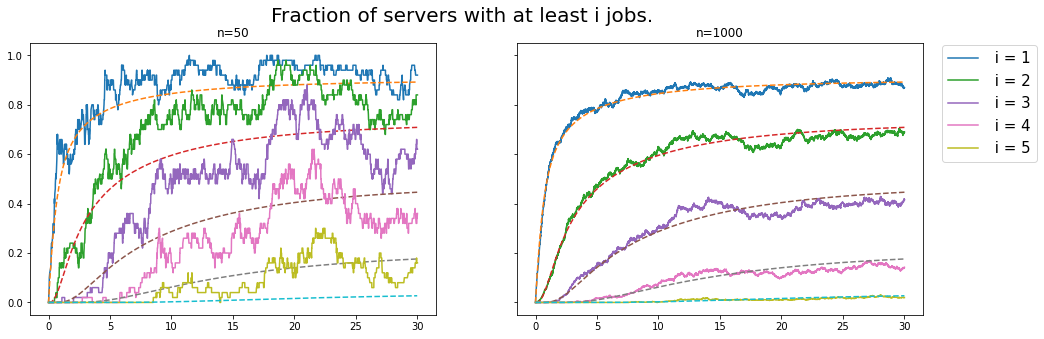

In [7]:
%matplotlib inline

# set figure parameters
f, axes = plt.subplots(1, 2, sharey=True)
f.set_figwidth(16)
f.set_figheight(5)
f.suptitle("Fraction of servers with at least i jobs.", fontsize=20)

# first subplot, sample trajectory with n=50 servers against mean field 
for i in range(1, 6):
    axes[0].plot(T_n50, X_n50[:,i], label=" i = " + str(i))

    axes[0].plot(T, x_transient[:,i], '--')

axes[0].legend(bbox_to_anchor=(2.5, 1.02), fontsize=15)
axes[0].set_title("n=50")


# second subplot, sample trajectory with n=1000 servers against mean field 
for i in range(1,6):
    axes[1].plot(T_n1k, X_n1k[:,i], label=" Queue length " + str(i))
    axes[1].plot(T, x_transient[:,i], '--')

axes[1].set_title("n=1000")
    
plt.show()

### Tool features: 

#### Mean Field Approximation (transient + steady state results) and Simulation for 

##### Homogeneous Population Models

$\rightarrow$ systems with similar object behavior

##### Heterogeneous Population Models [\[Allmeier and Gast, 2021\]](https://arxiv.org/abs/2111.01594)
$\rightarrow$ systems with varying object behavior

##### Refined Mean Field Approximation [\[Gast et al., 2019\]](https://www.sciencedirect.com/science/article/abs/pii/S0166531618302633?via%3Dihub) 
$\rightarrow$ increased accuracy \
$\rightarrow$ especially  important for $n \approx 10-100$







### Examples:

#### Power-of-two-choice model with varying server speeds

<img src="varying_server_speeds.svg"  height="30%"/>

#### More examples: (Heterogeneous) epidemic model (SIR/SIS) , caching policies, SSD garbage collection, load balancing models, etc.



# Thank you
### Sebastian Allmeier 

sebastian.allmeier@inria.fr

-----
### References
-----
<font color='blue'>rmf_tool – A library to Compute (Refined) Mean Field Approximation(s)</font> by Allmeier and Gast

$\rightarrow$ https://github.com/ngast/rmf_tool

<font color='blue'>Mean Field and Refined Mean Field Approximations for Heterogeneous Systems: It Works!</font> by Allmeier and Gast 

<font color='blue'>Size Expansions of Mean Field Approximation: Transient and Steady-State Analysis</font> by Gast, Bortolussi, Tribastone

<font color='blue'>Expected Values Estimated via Mean Field Approximation are O(1/N)-accurate</font> by Gast.

## Refined Mean Field Approximation (transient & steady-state)

The refined approximation is given by $x + \frac1n v$ for transient as well as steady state solutions.
The refinement term is calculated as shown below

In [28]:
# calculate refined mean field approximation for

# transient behavior
T, x_transient, v_transient, _  = ddpp.meanFieldExpansionTransient(order=1, time=30)

# steady state solution
x_steady, v_steady, _ = ddpp.meanFieldExpansionSteadyState(order=1)

# Heterogeneous Model Implementation

In the following the two choice model with varying server rates is implemented. We follow the definition and results of >>Mean Field and Refined Mean Field Approximations for Heterogeneous Systems: It Works! by Allmeier and Gast<<. In the paper one can also find an explicit description of the heterogeneous two choice model. 

In [8]:
import rmf_tool.src.heterogeneous_rmf_tool as hrmf

het_two_choice = hrmf.HetPP()

n = 15
K = 6

server_rates = np.random.uniform(low=0.8, high=1.3, size=n)

if sum(server_rates)/n < 1:
    print("System is unstable")

# initialization of rate tensors
A, B = np.zeros((n, K, K)), np.zeros((n, n, K, K, K, K)) 

# specify removal rates (uniateral transitions)

for s in range(1,K):
    A[:,s,s-1] = server_rates
    
# specify arrival rates

for  s in range(K-1):
    for s1 in range(s, K):
        B[:, :, s, s1, s+1, s1] = (2 / n) * _lambda 
    B[:, :, s, s, s+1, s] = (1 / n) * _lambda 
                
het_two_choice.add_rate_tensors(A, B)

In [9]:
# initial state
init_state = np.zeros((n, K))
init_state[:, 0] = 1 

het_two_choice.set_initial_state(init_state)

In [10]:
T_het, x_het = het_two_choice.ode(time=15)

In [11]:
T_het_n15, X_het_n15 = het_two_choice.simulate(time=15, seed=None)

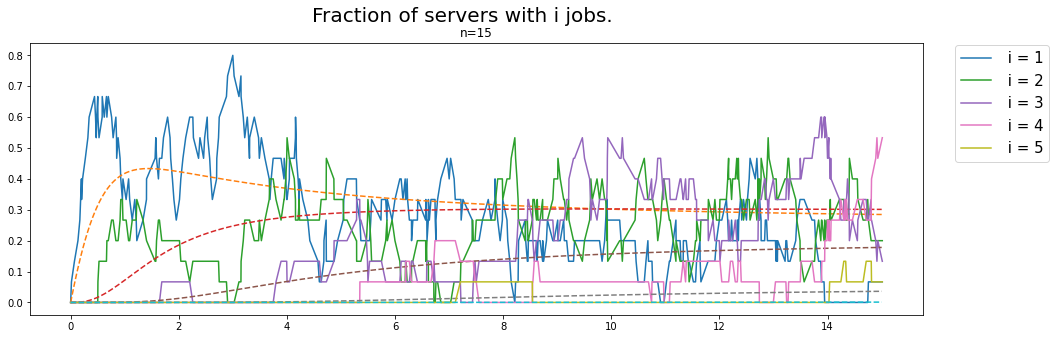

In [23]:
%matplotlib inline

# set figure parameters
f, axes = plt.subplots(1, 1, sharey=True)
f.set_figwidth(16)
f.set_figheight(5)
f.suptitle("Fraction of servers with i jobs.", fontsize=20)

# first subplot, sample trajectory with n=30 servers against mean field 
for i in range(1, 6):
    axes.plot(T_het_n15, np.sum(X_het_n15[:,:,i], axis=1)/n, label=" i = " + str(i))

    axes.plot(T_het, np.sum(x_het[:,:,i], axis=1)/n, '--')

axes.legend(bbox_to_anchor=(1.15, 1.02), fontsize=15)
axes.set_title("n=15")
   
plt.show()

In [13]:
# calculating the sample mean and variance may take some time
T_mean, X_mean = het_two_choice.sampleMean(samples=20, time=15)

Mean Calculation; Nr. Simulations done:
10  20  

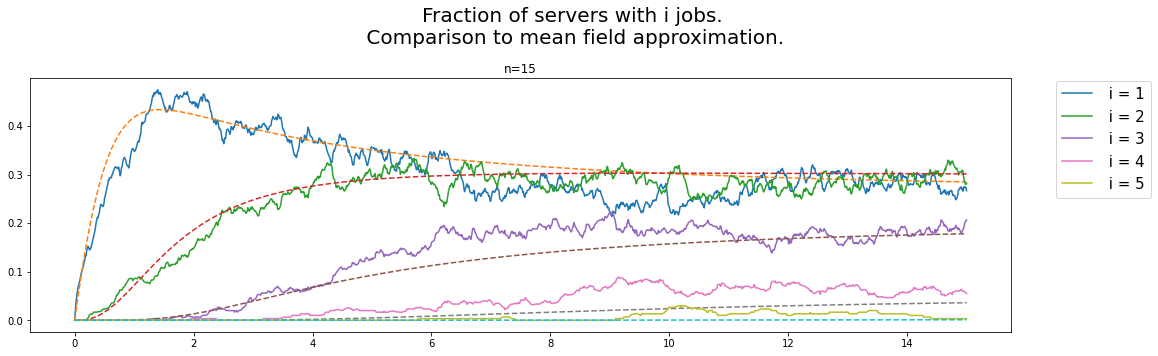

In [22]:
%matplotlib inline

# set figure parameters
f, axes = plt.subplots(1, 1, sharey=True)
f.set_figwidth(16)
f.set_figheight(5)
f.suptitle("Fraction of servers with i jobs.\n Comparison to mean field approximation.", fontsize=20)

# first subplot, sample trajectory with n=30 servers against mean field 
for i in range(1, 6):
    axes.plot(T_mean, np.sum(X_mean[:,:,i], axis=1)/n, label=" i = " + str(i))

    axes.plot(T_het, np.sum(x_het[:,:,i], axis=1)/n, '--')

axes.legend(bbox_to_anchor=(1.15, 1.02), fontsize=15)
axes.set_title("n=15")
plt.tight_layout()
plt.show()